In [2]:
import pandas as pd
import random
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import plotly.express as px

# Parameters
num_rows = 1000

# Simulated data for each column
dates = [datetime(2024, 1, 1) + timedelta(days=i) for i in range(num_rows)]
times = [random.choice(["Lunch", "Dinner"]) for _ in range(num_rows)]
customer_ids = [f"CUST{1000 + i}" for i in range(num_rows)]
age_groups = [random.choice(["20s", "30s", "40s", "50s", "60+"]) for _ in range(num_rows)]
nationalities = [random.choice(["Japan", "USA", "France", "China", "Australia", "UK"]) for _ in range(num_rows)]
meal_types = [random.choice(["Set Menu", "Tasting Menu"]) for _ in range(num_rows)]
wine_pairings = [random.choice(["Yes", "No"]) for _ in range(num_rows)]
beverage_sales = [round(random.uniform(50, 200), 2) if wine == "Yes" else round(random.uniform(0, 100), 2) for wine in wine_pairings]
food_sales = [round(random.uniform(150, 500), 2) for _ in range(num_rows)]
total_sales = [round(bev + food, 2) for bev, food in zip(beverage_sales, food_sales)]
special_requests = [random.choice(["None", "Vegetarian", "Gluten-Free", "Birthday", "Anniversary"]) for _ in range(num_rows)]
service_ratings = [random.randint(3, 5) for _ in range(num_rows)]  # Ratings between 3 and 5

# Create DataFrame
df = pd.DataFrame({
    "Date": dates,
    "Time": times,
    "Customer ID": customer_ids,
    "Customer Age Group": age_groups,
    "Customer Nationality": nationalities,
    "Meal Type": meal_types,
    "Wine Pairing": wine_pairings,
    "Beverage Sales": beverage_sales,
    "Food Sales": food_sales,
    "Total Sales": total_sales,
    "Special Requests": special_requests,
    "Service Rating": service_ratings
})

df


,Date,Time,Customer ID,Customer Age Group,Customer Nationality,Meal Type,Wine Pairing,Beverage Sales,Food Sales,Total Sales,Special Requests,Service Rating
0,2024-01-01,Dinner,CUST1000,40s,Japan,Tasting Menu,No,17.59,438.49,456.08,Birthday,3
1,2024-01-02,Lunch,CUST1001,20s,Australia,Tasting Menu,Yes,55.94,232.72,288.66,Anniversary,3
2,2024-01-03,Lunch,CUST1002,40s,China,Set Menu,Yes,94.78,446.02,540.80,None,3
3,2024-01-04,Lunch,CUST1003,40s,USA,Tasting Menu,No,54.34,432.35,486.69,Birthday,4
4,2024-01-05,Lunch,CUST1004,30s,Australia,Tasting Menu,No,2.85,301.76,304.61,None,3
...,...,...,...,...,...,...,...,...,...,...,...,...
995,2026-09-22,Lunch,CUST1995,50s,Australia,Tasting Menu,Yes,183.98,230.13,414.11,None,4
996,2026-09-23,Lunch,CUST1996,50s,France,Tasting Menu,Yes,61.81,232.13,293.94,Anniversary,4
997,2026-09-24,Lunch,CUST1997,30s,Japan,Set Menu,No,67.44,205.86,273.30,Gluten-Free,3
998,2026-09-25,Dinner,CUST1998,40s,UK,Tasting Menu,Yes,113.09,296.42,409.51,Vegetarian,5


In [3]:
# Assumptions
cogs_percentage = 0.30  # COGS assumed as 30% of total sales
overhead_percentage = 0.20  # Additional overhead cost as 20% of total sales
service_hours_per_session = 2  # Each session (lunch/dinner) is 2 hours
seating_capacity = 50  # Seating capacity of the restaurant

# Calculations

# Gross Profit Margin: [(Total Sales - COGS) / Total Sales] * 100
df['COGS'] = df['Total Sales'] * cogs_percentage
df['Gross Profit'] = df['Total Sales'] - df['COGS']
df['Gross Profit Margin (%)'] = (df['Gross Profit'] / df['Total Sales']) * 100

# Net Profit Margin: [(Total Sales - Total Expenses) / Total Sales] * 100
df['Overhead'] = df['Total Sales'] * overhead_percentage
df['Total Expenses'] = df['COGS'] + df['Overhead']
df['Net Profit'] = df['Total Sales'] - df['Total Expenses']
df['Net Profit Margin (%)'] = (df['Net Profit'] / df['Total Sales']) * 100

# Average Check Value: Total Sales / Number of Sales (or rows)
average_check_value = df['Total Sales'].mean()

# RevPASH: Total Sales / (Seating Capacity * Total Service Hours)
total_service_hours = service_hours_per_session * len(df)  # Total service hours across all rows (each row = 1 session)
rev_pash = df['Total Sales'].sum() / (seating_capacity * total_service_hours)

# Aggregating results
kpi_results = {
    "Average Gross Profit Margin (%)": df['Gross Profit Margin (%)'].mean(),
    "Average Net Profit Margin (%)": df['Net Profit Margin (%)'].mean(),
    "Average Check Value": average_check_value,
    "RevPASH": rev_pash
}

kpi_results


{'Average Gross Profit Margin (%)': 70.0,
 'Average Net Profit Margin (%)': 50.0,
 'Average Check Value': 402.53990000000005,
 'RevPASH': 4.025399}

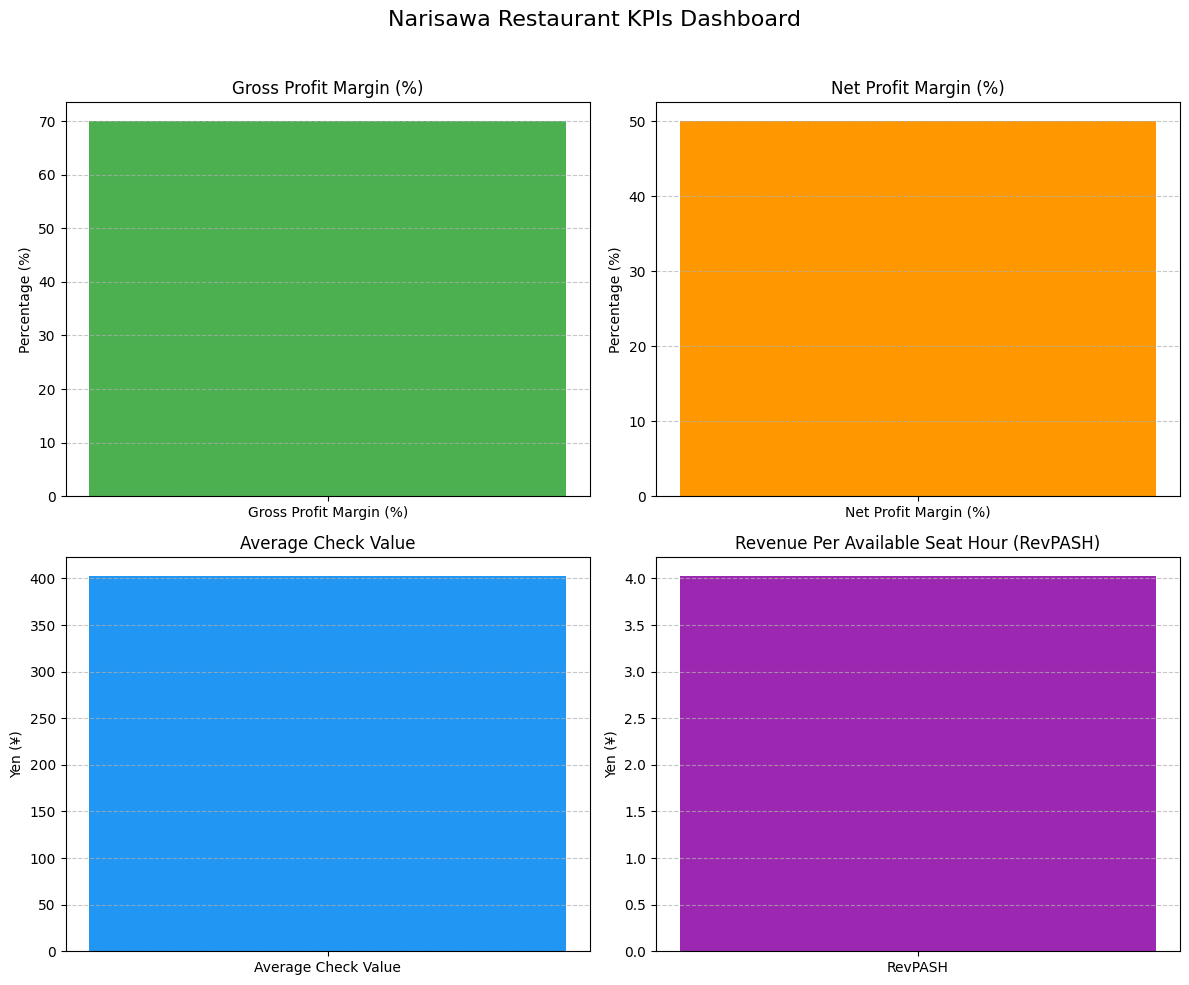

In [4]:
# Creating subplots to display each KPI on its own graph

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Narisawa Restaurant KPIs Dashboard", fontsize=16)

# Gross Profit Margin
axes[0, 0].bar(["Gross Profit Margin (%)"], [kpi_results["Average Gross Profit Margin (%)"]], color='#4CAF50')
axes[0, 0].set_ylabel("Percentage (%)")
axes[0, 0].set_title("Gross Profit Margin (%)")
axes[0, 0].grid(axis='y', linestyle='--', alpha=0.7)

# Net Profit Margin
axes[0, 1].bar(["Net Profit Margin (%)"], [kpi_results["Average Net Profit Margin (%)"]], color='#FF9800')
axes[0, 1].set_ylabel("Percentage (%)")
axes[0, 1].set_title("Net Profit Margin (%)")
axes[0, 1].grid(axis='y', linestyle='--', alpha=0.7)

# Average Check Value
axes[1, 0].bar(["Average Check Value"], [kpi_results["Average Check Value"]], color='#2196F3')
axes[1, 0].set_ylabel("Yen (¥)")
axes[1, 0].set_title("Average Check Value")
axes[1, 0].grid(axis='y', linestyle='--', alpha=0.7)

# RevPASH
axes[1, 1].bar(["RevPASH"], [kpi_results["RevPASH"]], color='#9C27B0')
axes[1, 1].set_ylabel("Yen (¥)")
axes[1, 1].set_title("Revenue Per Available Seat Hour (RevPASH)")
axes[1, 1].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout for clarity
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


##Customer_Satisfaction

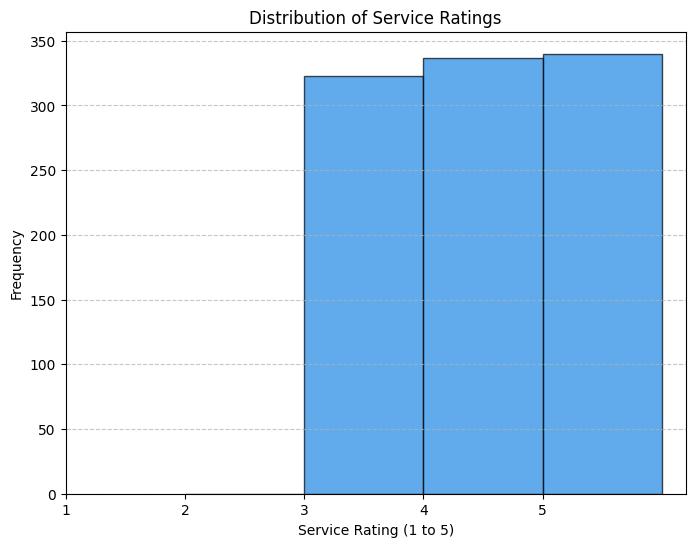

In [5]:
# Visualizing the distribution of Service Ratings from the dataset

# Setting up figure size and title
plt.figure(figsize=(8, 6))
plt.hist(df['Service Rating'], bins=range(2, 7), color='#1E88E5', edgecolor='black', alpha=0.7)

# Adding titles and labels
plt.title("Distribution of Service Ratings")
plt.xlabel("Service Rating (1 to 5)")
plt.ylabel("Frequency")
plt.xticks(range(1, 6))  # Ratings from 1 to 5
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()


##Sales_Growth_Rate

<ipython-input-6-be020e50e624>:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  months = pd.date_range(start="2024-01-01", periods=12, freq='M')


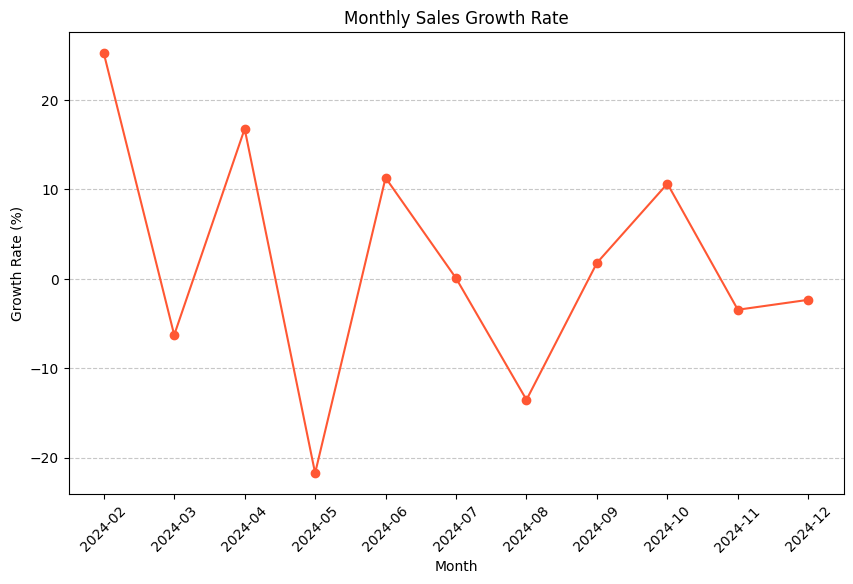

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta

# Generating sample data for 12 months
months = pd.date_range(start="2024-01-01", periods=12, freq='M')
monthly_sales_values = [round(50000 + np.random.normal(0, 5000), 2) for _ in range(12)]

# Create a DataFrame for monthly sales
monthly_sales_df = pd.DataFrame({
    "Month": months,
    "Total Sales": monthly_sales_values
})

# Calculate the Monthly Sales Growth Rate
monthly_sales_df['Monthly Sales Growth Rate (%)'] = monthly_sales_df['Total Sales'].pct_change() * 100

# Plotting the Monthly Sales Growth Rate
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales_df['Month'].dt.strftime('%Y-%m'),
         monthly_sales_df['Monthly Sales Growth Rate (%)'],
         marker='o', color='#FF5733', linestyle='-', linewidth=1.5)
plt.title("Monthly Sales Growth Rate")
plt.xlabel("Month")
plt.ylabel("Growth Rate (%)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()



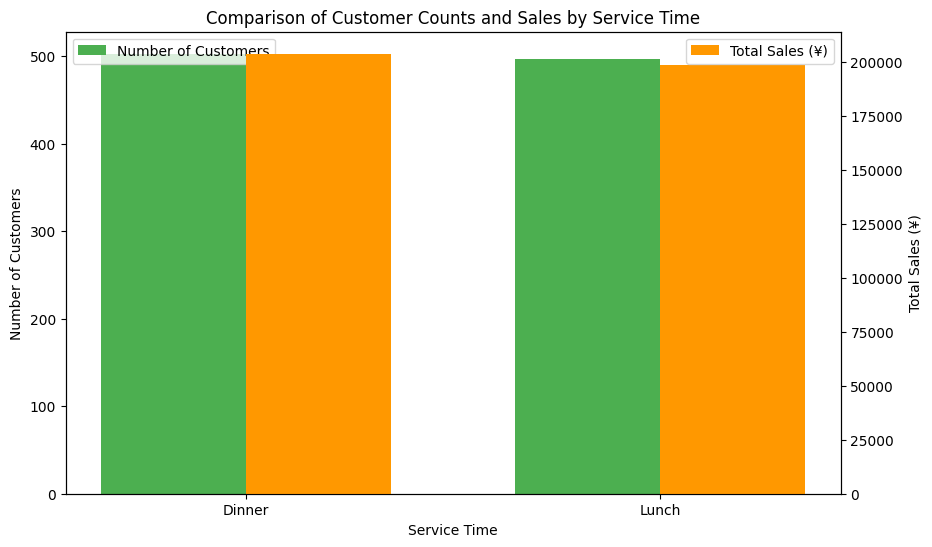

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data - assuming 'df' contains 'Time' (Lunch/Dinner), 'Customer ID', and 'Total Sales' columns
# Uncomment if running with a sample dataframe:
# df = pd.DataFrame({
#     'Time': ['Lunch', 'Dinner', 'Lunch', 'Dinner'] * 25,
#     'Customer ID': [f'CUST{i}' for i in range(1, 101)],
#     'Total Sales': [round(100 + i*5, 2) for i in range(1, 101)]
# })

# Count the number of customers for each service time
customer_counts = df.groupby('Time')['Customer ID'].nunique()

# Calculate the total sales for each service time
total_sales = df.groupby('Time')['Total Sales'].sum()

# Create a grouped bar chart
fig, ax1 = plt.subplots(figsize=(10, 6))

# Set up bar positions
bar_width = 0.35
index = range(len(customer_counts))

# Plot customer counts
ax1.bar(index, customer_counts, bar_width, label='Number of Customers', color='#4CAF50')

# Plot total sales next to customer counts
ax2 = ax1.twinx()
ax2.bar([i + bar_width for i in index], total_sales, bar_width, label='Total Sales (¥)', color='#FF9800')

# Set axis labels and titles
ax1.set_xlabel("Service Time")
ax1.set_ylabel("Number of Customers")
ax2.set_ylabel("Total Sales (¥)")
plt.title("Comparison of Customer Counts and Sales by Service Time")

# Set x-tick labels and legend
ax1.set_xticks([i + bar_width / 2 for i in index])
ax1.set_xticklabels(customer_counts.index)
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

# Display the plot
plt.show()



In [8]:
import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Sample data - assuming 'df' contains 'Time' (Lunch/Dinner), 'Customer ID', and 'Total Sales' columns
# Uncomment if running with a sample dataframe:
# df = pd.DataFrame({
#     'Time': ['Lunch', 'Dinner', 'Lunch', 'Dinner'] * 25,
#     'Customer ID': [f'CUST{i}' for i in range(1, 101)],
#     'Total Sales': [round(100 + i*5, 2) for i in range(1, 101)]
# })

# Count the number of customers for each service time
customer_counts = df.groupby('Time')['Customer ID'].nunique()

# Calculate the total sales for each service time
total_sales = df.groupby('Time')['Total Sales'].sum()

# Creating the Plotly figure with vivid colors
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Adding the customer count trace
fig.add_trace(
    go.Bar(
        x=customer_counts.index,
        y=customer_counts,
        name="Number of Customers",
        marker=dict(color='#FF4C4C'),  # Vivid red color for customers
    ),
    secondary_y=False,
)

# Adding the total sales trace
fig.add_trace(
    go.Bar(
        x=total_sales.index,
        y=total_sales,
        name="Total Sales (¥)",
        marker=dict(color='#4CFF99'),  # Vivid green color for sales
    ),
    secondary_y=True,
)

# Updating layout for titles and axis labels
fig.update_layout(
    title_text="Comparison of Customer Counts and Total Sales by Service Time",
    xaxis_title="Service Time",
    yaxis_title="Number of Customers",
    yaxis2_title="Total Sales (¥)",
    barmode='group',  # Group bars side-by-side
    template="plotly_dark",  # Dark background with vivid colors
)

# Display the figure
fig.show()


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     1000 non-null   datetime64[ns]
 1   Time                     1000 non-null   object        
 2   Customer ID              1000 non-null   object        
 3   Customer Age Group       1000 non-null   object        
 4   Customer Nationality     1000 non-null   object        
 5   Meal Type                1000 non-null   object        
 6   Wine Pairing             1000 non-null   object        
 7   Beverage Sales           1000 non-null   float64       
 8   Food Sales               1000 non-null   float64       
 9   Total Sales              1000 non-null   float64       
 10  Special Requests         1000 non-null   object        
 11  Service Rating           1000 non-null   int64         
 12  COGS                     1000 non-n

In [10]:
# Assuming the DataFrame 'df' contains 'Country' and 'Total Sales' columns.

# Sample data generation if needed:
# import pandas as pd
# import numpy as np
# df = pd.DataFrame({
#     'Country': np.random.choice(['Japan', 'USA', 'France', 'UK', 'Germany', 'Canada', 'Australia', 'China'], size=100),
#     'Total Sales': np.random.randint(500, 2000, size=100)
# })

# Calculate total sales per country and get top countries
top_countries_sales = df.groupby('Customer Nationality')['Total Sales'].sum().nlargest(10).reset_index()

# Using Plotly to visualize the top countries by sales
import plotly.express as px

# Create the bar chart with vivid colors
fig = px.bar(
    top_countries_sales,
    x='Customer Nationality',
    y='Total Sales',
    title="Top Countries by Total Sales",
    labels={'Total Sales': 'Total Sales (¥)', 'Country': 'Country'},
    color='Total Sales',
    color_continuous_scale='Viridis'  # Vivid color scale
)

# Customize layout for better readability
fig.update_layout(
    xaxis_tickangle=-45,
    template="plotly_dark"  # Dark background with vibrant color scale
)

# Display the figure
fig.show()


In [11]:
# Assuming the DataFrame 'df' contains 'Country' and 'Customer ID' columns
# Here, 'Country' represents the nationality of each customer.

# Sample data generation if needed:
# import pandas as pd
# import numpy as np
# df = pd.DataFrame({
#     'Country': np.random.choice(['Japan', 'USA', 'France', 'UK', 'Germany', 'Canada', 'Australia', 'China'], size=100),
#     'Customer ID': [f'CUST{i}' for i in range(1, 101)]
# })

# Count the number of unique customers per country
customer_counts_by_country = df.groupby('Customer Nationality')['Customer ID'].nunique().reset_index()
customer_counts_by_country = customer_counts_by_country.rename(columns={'Customer ID': 'Number of Customers'})

# Using Plotly to visualize the number of customers by nationality
import plotly.express as px

# Create the bar chart with vivid colors
fig = px.bar(
    customer_counts_by_country,
    x='Customer Nationality',
    y='Number of Customers',
    title="Number of Customers by Nationality",
    labels={'Number of Customers': 'Number of Customers', 'Country': 'Country'},
    color='Number of Customers',
    color_continuous_scale='Plasma'  # Vivid color scale for visual appeal
)

# Customize layout for better readability
fig.update_layout(
    xaxis_tickangle=-45,
    template="plotly_dark"  # Dark background with vibrant color scale
)

# Display the figure
fig.show()


##perform sales forecasting using the Prophet

In [23]:
from prophet import Prophet
import pandas as pd

# Aggregate the simulated dataset to get daily total sales
daily_sales = df.groupby("Date").agg({"Total Sales": "sum"}).reset_index()
daily_sales.columns = ["ds", "y"]  # Rename columns to fit Prophet's expectations







In [24]:
# Initialize and fit the Prophet model
model = Prophet()
model.fit(daily_sales)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpd488nfpq/rj1tejk0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpd488nfpq/vz5k9nrd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82986', 'data', 'file=/tmp/tmpd488nfpq/rj1tejk0.json', 'init=/tmp/tmpd488nfpq/vz5k9nrd.json', 'output', 'file=/tmp/tmpd488nfpq/prophet_model5j3od1fd/prophet_model-20241105215951.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:59:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:59:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [25]:
# Define a future dataframe for prediction
future = model.make_future_dataframe(periods=30)  # Forecasting 30 days into the future

In [26]:

# Make predictions
forecast = model.predict(future)


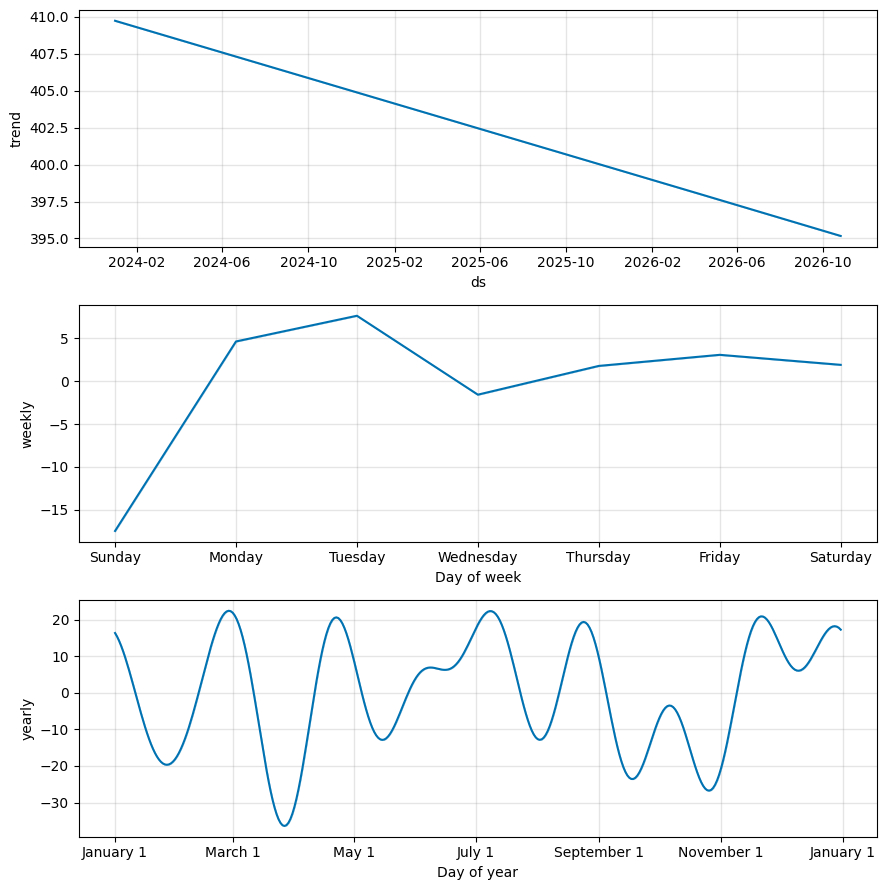

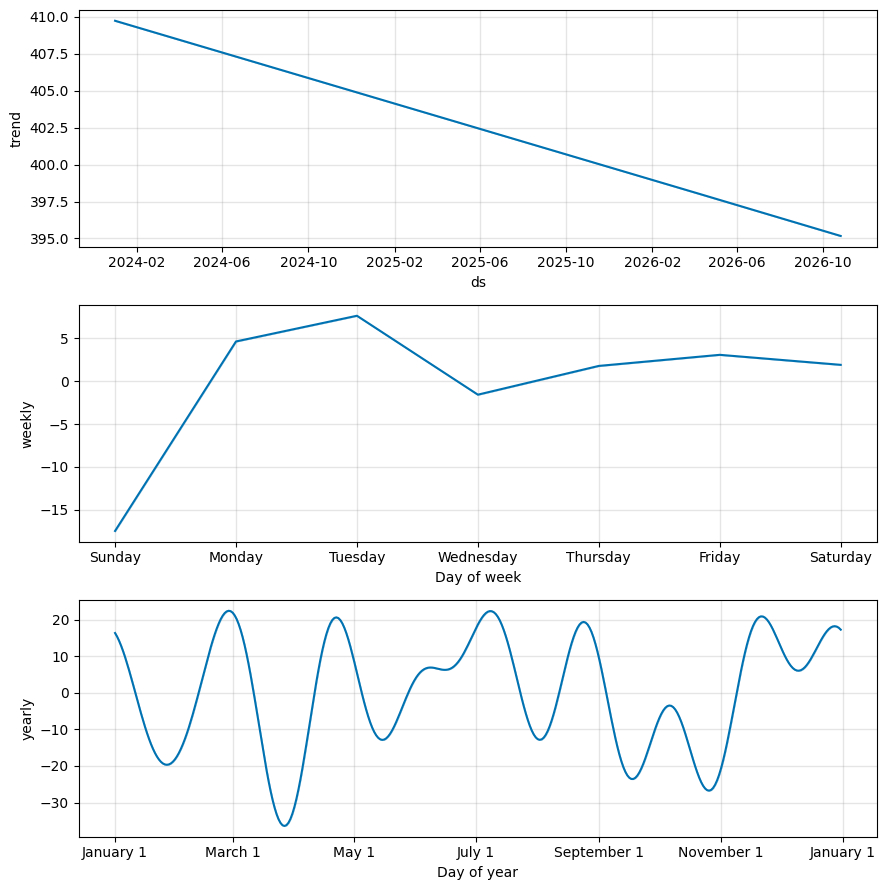

In [29]:
# Plot the forecast
#model.plot(forecast)
model.plot_components(forecast)
